## Project: Capstone DS Brainstation

## Data Loading & Cleaning

### Sprint 1: Sentiment Analysis for Mental Health

### Author: Gennaro Costantino

### Date: Aug 21, 2024


## Table of Contents
---
1. [Project Overview](#introduction)
2. [Key Questions](#keyquestions)
3. [Methods Used for Analysis](#methods)
    -[Loading Libraries](#libs)
4. [Data Set](#dataset)
    - [Data Dictionary](#dict)
5. [Initial Data Cleaning](#cleaning)
    - [Plan of Action](#action)
    - [Data Loading](#load)
    - [Data Assessment](#assess)
    - [Handling Missing Values](#missing)
6. [Findings Summary](#findings)
    - [Next Steps](#next)

## Project Overview <a class="anchor" id="introduction"></a>

This project utilizes Machine Learning techniques to attempt to increase the accuracy of understanding public sentiment on mental health issues via social media.

This project will attempt to find a solution to the following:

"How does public sentiment towards mental health issues vary across different conditions (e.g., depression, anxiety, suicidal thoughts) on social media, and how can this sentiment inform mental health interventions and policy-making?"

## Key Questions <a class="anchor" id="keyquestions"></a>

This project utilizes Machine Learning techniques to attempt to increase the accuracy of understanding public sentiment on mental health issues via social media.

This project will attempt to find a solution to the following:

"How does public sentiment towards mental health issues vary across different conditions (e.g., depression, anxiety, suicidal thoughts) on social media, and how can this sentiment inform mental health interventions and policy-making?"

## Methods Used for Analysis <a class="anchor" id="methods"></a>
---

I used `Python 3` in `Jupyter Lab` and its associated libraries:
 - Pandas
- Matplotlib
- Numpy
- Seasborn
- x
- y
- u
- i
- o

We will load necesssary libraries below. More libraries will be loaded as needed for analysis.

### Loading the Necessary Libraries <a class="anchor" id="load"></a>. 

In [120]:
#load the necessary libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

## Data Set <a class="anchor" id="dataset"></a>
---
The data used for this project is derived from various social media platforms where mental health is a common topic of discussion. This includes Twitter data, Reddit posts, and to build our model we have used the Sentiment Analysis for Mental Health (Kaggle) dataset:

https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health.

### Data Dictionary <a class="anchor" id="dict"></a>

To help with the analysis, study the data dictionary below.

<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Description</th>
  </tr>
  <tr>
    <td style="text-align: left"> <code>unique_id</code> </td>
    <td style="text-align: left">A unique identifier for each entry.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Statement</code></td>
    <td style="text-align: left">The textual data or post.</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>Mental Health Status</code></td>
    <td style="text-align: left">The tagged mental health status of the statement.</td>
  </tr>
</table>

## Initial Data Cleaning <a class="anchor" id="cleaning"></a>
---


### Plan of action <a class="anchor" id="action"></a>

1. Data Loading
2. Initial Data Assessment
2. Data Cleaning
    - Dealing with duplicated values
    - Dealing with redundant columns
    - Dealing with null values
3. EDA 
4. Draw insights
5. Formulate a conclusion

### Data Loading <a class="anchor" id="load"></a>

In [127]:
#load the data set
df = pd.read_csv(r'C:\Users\User\Documents\Brain Station\Data Science\Capstone\capstone_social_listening_GC\data\Mental Health\Combined Data.csv')

### Data Assesment <a class="anchor" id="assess"></a>
---

First lets take a look at the number of rows and columns in this data set

In [130]:
# Check the shape of the data:
df.shape

(53043, 3)

**Observations:**

There are 53,043 rows and 3 columns in this dataset

---


Next let familiarize ourselves with the data by checking th information contained in the first few rows

In [133]:
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


Next Steps:
- Check data types and formats
- Check for duplicates
- Check missing data

---

In [135]:
df.info() # there is a few nan in 'statement' column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


**Observations:**

This data set contains the following data types:

- `int64`(1)
- `obect`(2)

There seems to be columns with null values which we will take care of shortly.

---

Next we will take a look at the number duplicate rows in the dataframe

In [138]:
#Check the number of duplicated rows
df.duplicated().sum()

0

**Observations:**

There are no duplicated rows in this data frame. 

---


Next we will take a look if any columns are duplicated by transposing the dataframe and running the duplicated function from above

In [141]:
# Transpose the data frame and then look for duplicated rows to determine if any of the columns are duplicated:
df.T.duplicated().sum()

0

**Observations:**

There are no duplicated columns in this data frame. 

---

### Handling Missing Values <a class="anchor" id="missing"></a>

In [144]:
# Checking for missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

Unnamed: 0      0
statement     362
status          0
dtype: int64


In [145]:
#check for missing values:
null_counts = df.isna().sum()
columns_with_nulls = null_counts[null_counts > 0]
columns_with_nulls
#lets take a look at the percentage of the data that these nulls make up
percentage_nulls = columns_with_nulls/df.shape[0]*100
percentage_nulls

statement    0.682465
dtype: float64

**Observations:**

There is only one column with a low percentage of missing values.
- `statement`: ~0.7% missing


No action taken. Insignificant. 

---

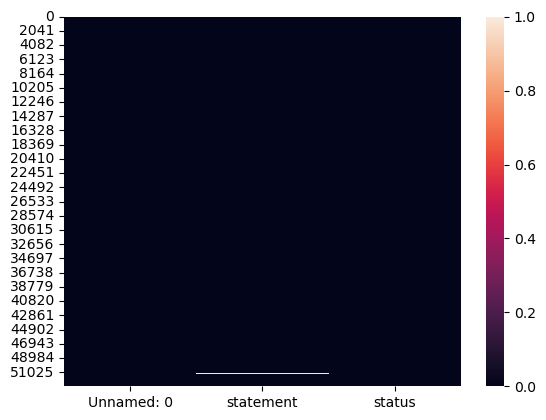

In [147]:
# Visualize missing data using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isnull())
plt.show()

## Finding Summary <a class="anchor" id="findings"></a>

The data has been assessed and cleaned by performing the following steps:

- Checking for duplicated
- Dropping redundant or insignificant columns
- Dropping columns with a high proportion of null values
- Filling in null vlaues with the first iteration of appropriate values

## Understand the Data Types:

In [150]:
df.describe()

,Unnamed: 0
count,53043.000000
mean,26521.000000
std,15312.339501
min,0.000000
25%,13260.500000
50%,26521.000000
75%,39781.500000
max,53042.000000


In [162]:
# Displaing the distribution of categorical columns:
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)

